In [1]:
FILENAME REFFILE '/folders/myfolders/chapter2.xlsx';
PROC IMPORT DATAFILE=REFFILE
    DBMS=XLSX
    OUT=WORK.raw;
    GETNAMES=YES;
RUN;

SAS Connection established. Subprocess id is 3377



In [2]:
PROC CONTENTS DATA=WORK.raw;
RUN;

In [3]:
PROC UNIVARIATE DATA=raw;
ID date;
VAR stock;
RUN;


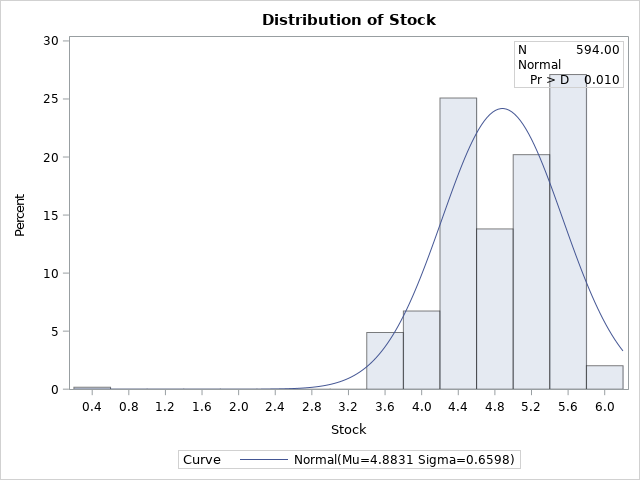

In [4]:
PROC UNIVARIATE DATA=raw;
HISTOGRAM Stock / normal(percents=20 40 60 80 midpercents)
                     name='MyPlot';
INSET n normal(ksdpval) / pos = ne format = 6.3;
RUN;

In [5]:
FILENAME REFFILE '/folders/myfolders/chapter2_modified.xlsx';
PROC IMPORT DATAFILE=REFFILE
    DBMS=XLSX
    OUT=WORK.model;
    GETNAMES=YES;
RUN;


In [6]:
PROC CONTENTS DATA=WORK.model;
RUN;


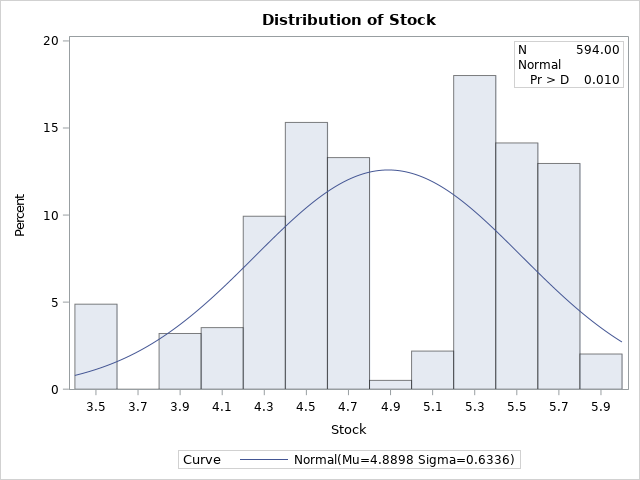

In [7]:
PROC UNIVARIATE DATA=model;
HISTOGRAM Stock / normal(percents=20 40 60 80 midpercents)
                     name='MyPlot';
INSET n normal(ksdpval) / pos = ne format = 6.3;
RUN;

In [8]:
PROC CORR DATA=model outp=corr nosimple;
ID Date;
WITH Stock;
VAR Basket_index -- M1_money_supply_index;
RUN;

In [9]:
Data Build Validation;
Set Model;
If date le "30Nov2017"d then output build;
Else output validation;
Run;


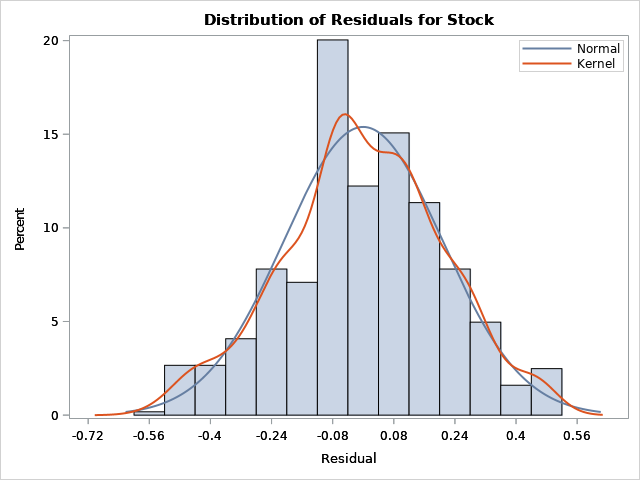
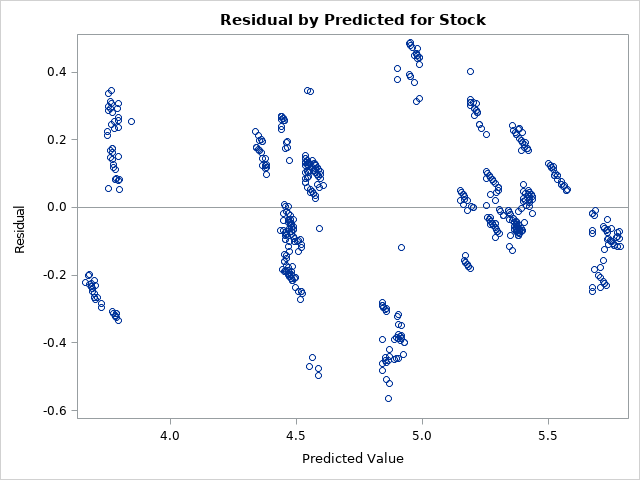
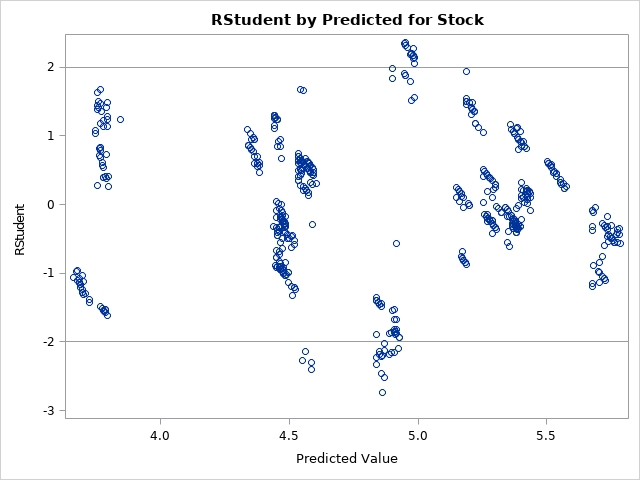
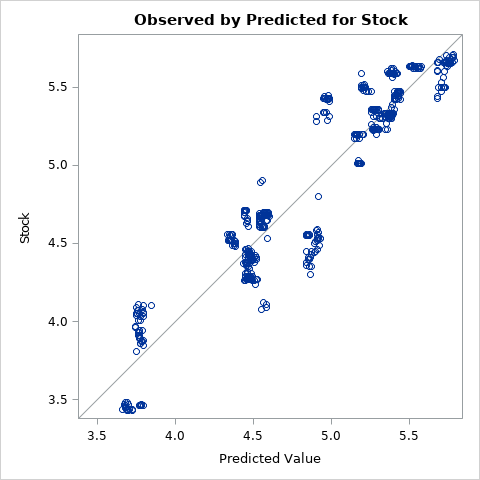
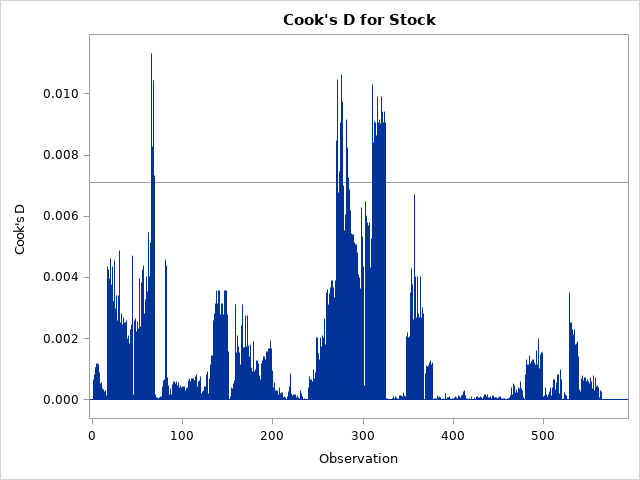
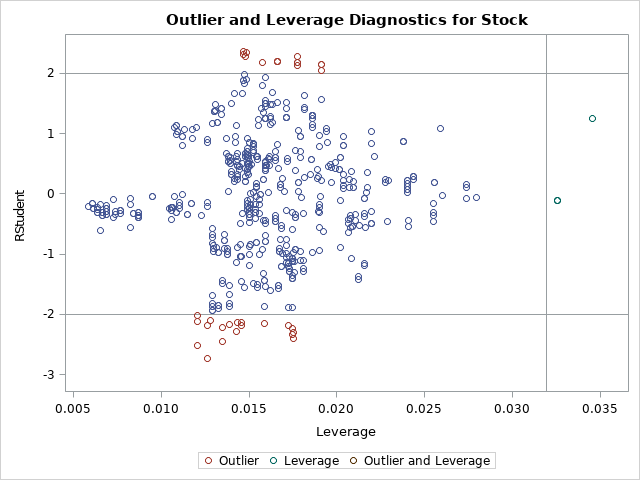
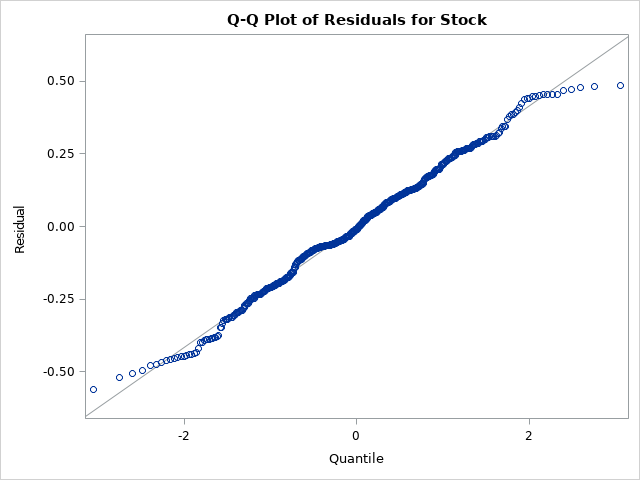
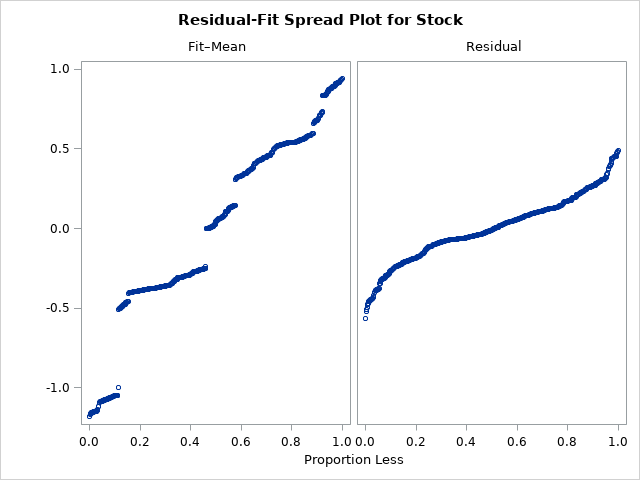
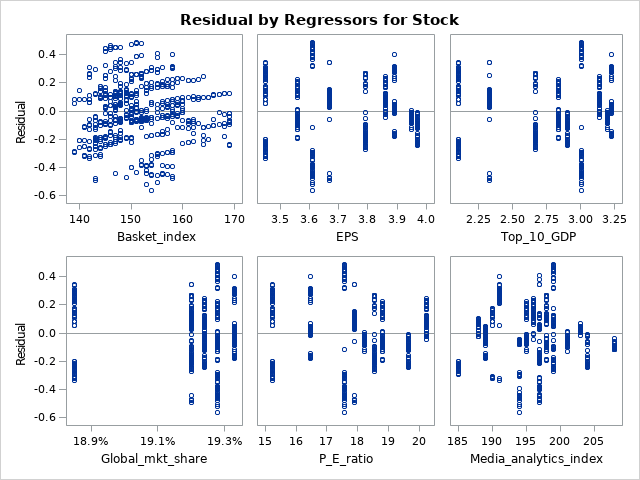
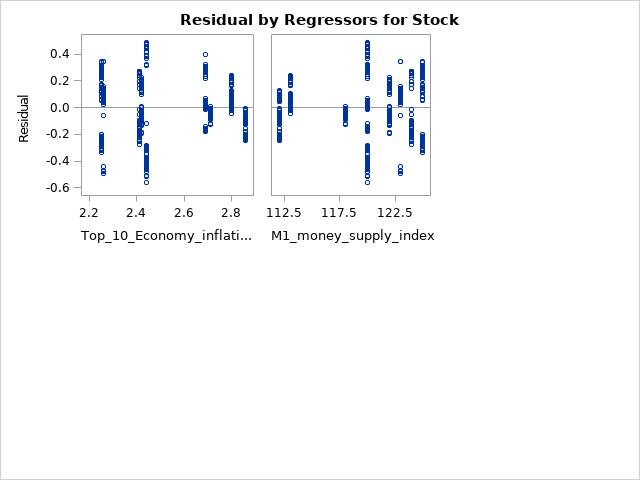

In [10]:
PROC REG DATA=build plots=diagnostics(unpack);
ID date;
MODEL stock = basket_index -- m1_money_supply_index;
RUN;


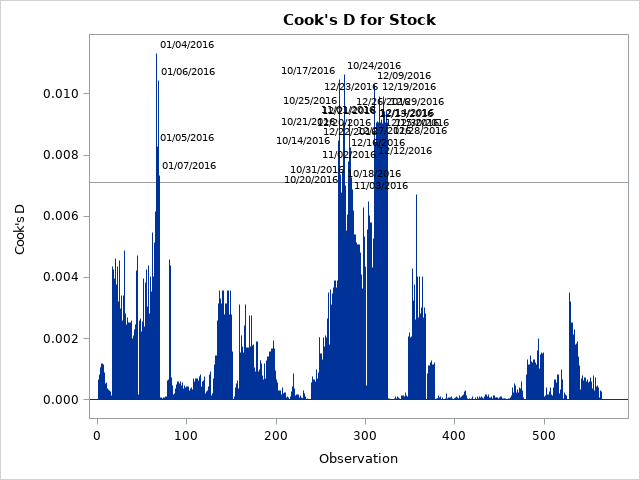
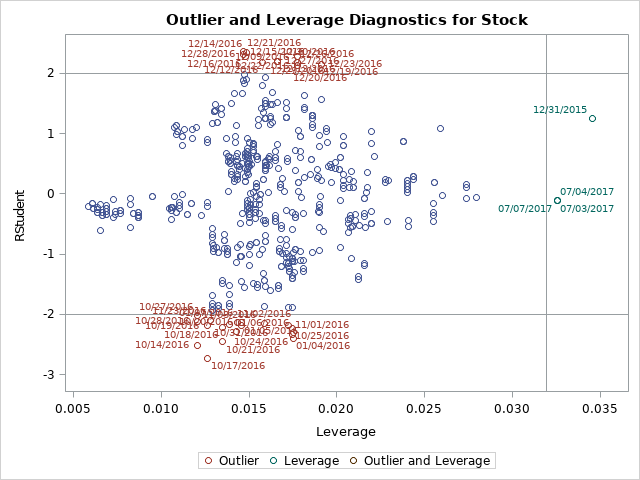

In [11]:
/* Proc Regression Code for Identifying High Leverage Observations: */
PROC REG DATA=build plots(only label)=(RStudentByLeverage CooksD);
ID date;
MODEL stock = basket_index -- m1_money_supply_index;
RUN;


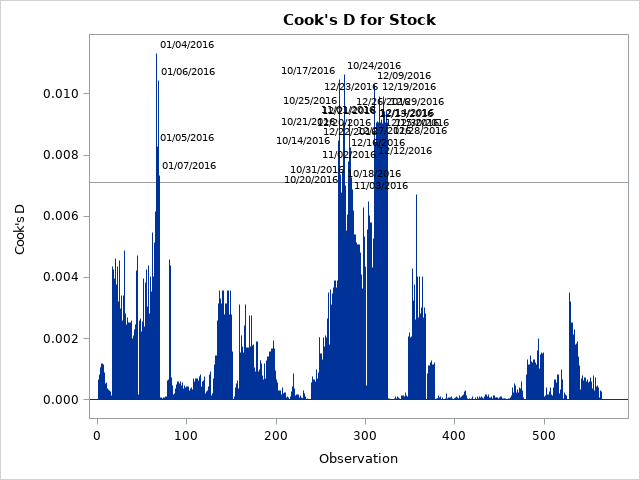
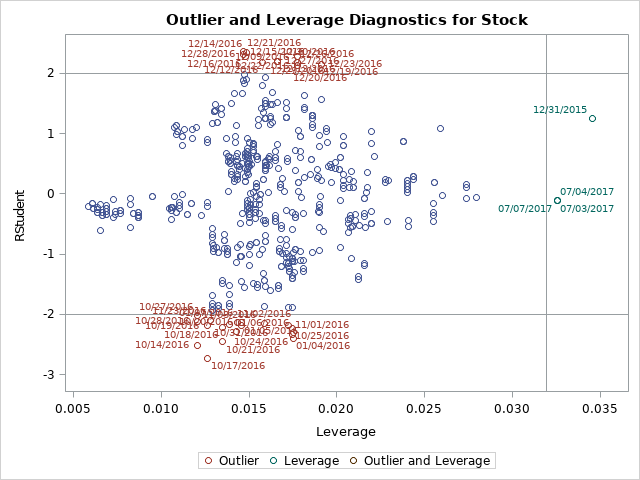

In [12]:
/* The Proc Regression Code for Multicollinearity: */
PROC REG DATA=build plots(only label)=(RStudentByLeverage CooksD);
ID date;
MODEL stock = basket_index -- m1_money_supply_index/tol vif;
RUN;


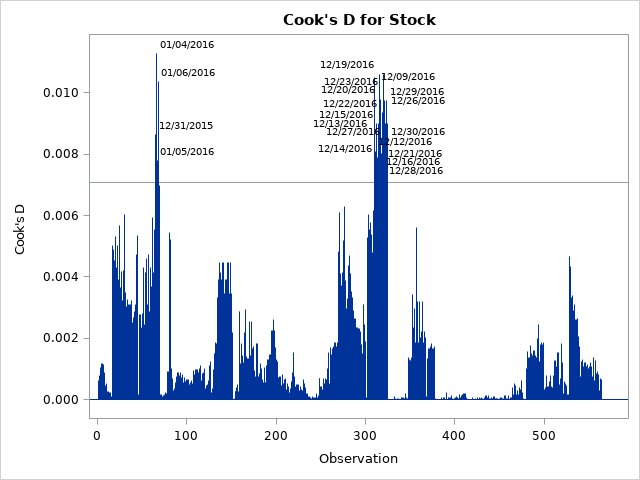
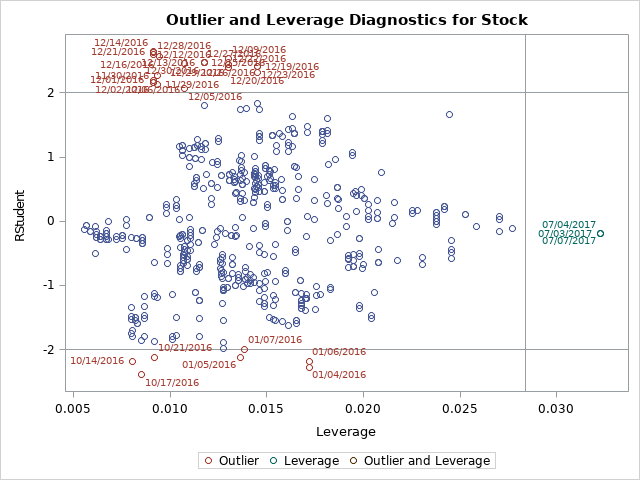

In [13]:
/* Proc Regression Code for Multicollinearity After Removal of a Variable: */
PROC REG DATA=build plots(only label)=(RStudentByLeverage CooksD);
ID date;
MODEL stock = basket_index eps p_e_ratio global_mkt_share media_analytics_index
m1_money_supply_index top_10_gdp/tol vif;
RUN;


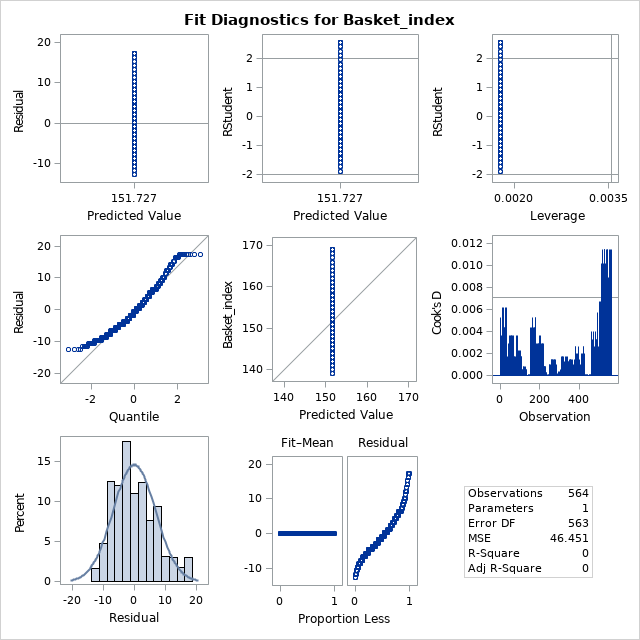
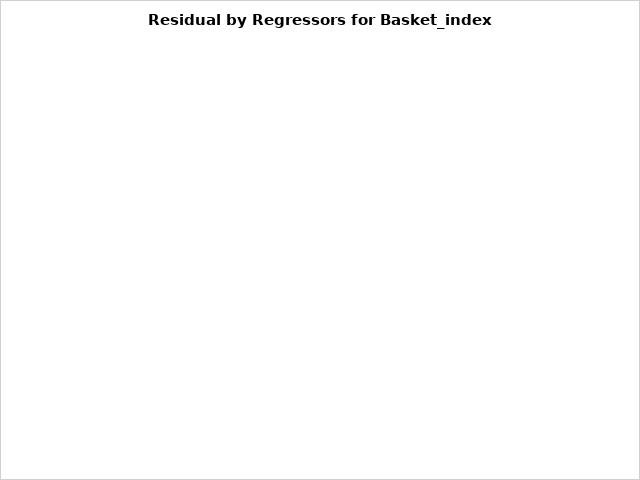
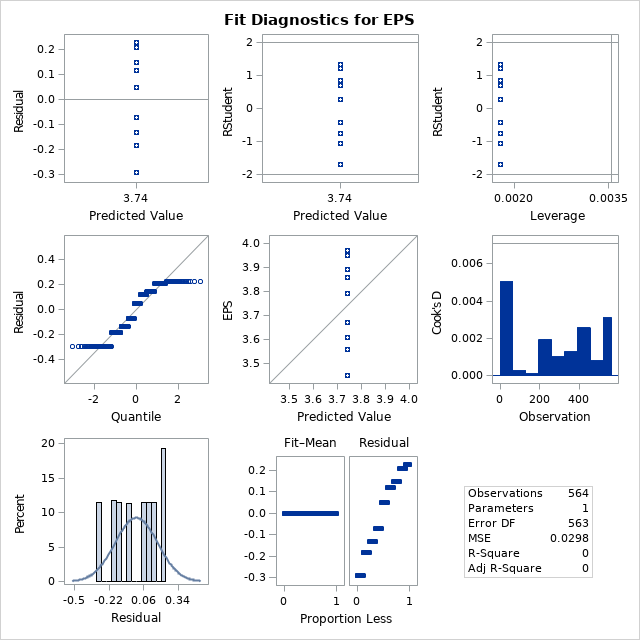
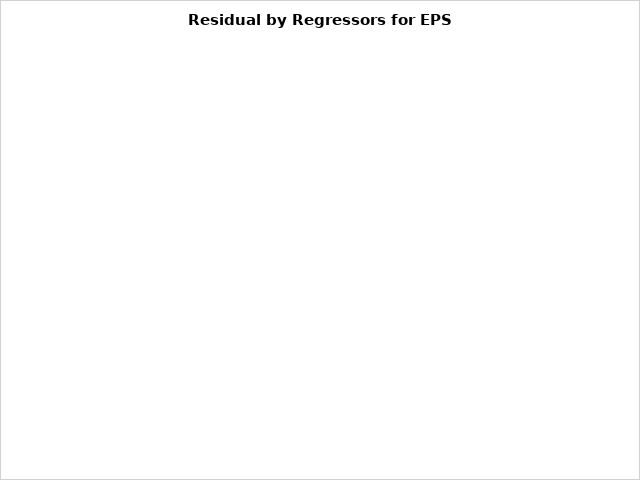
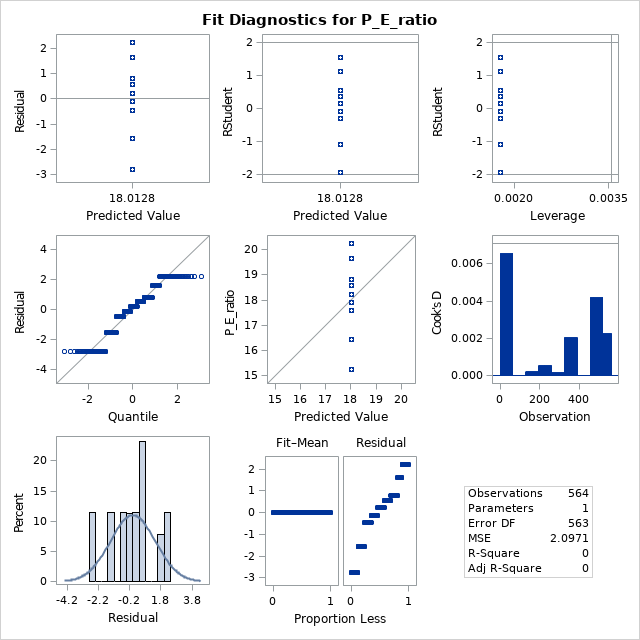
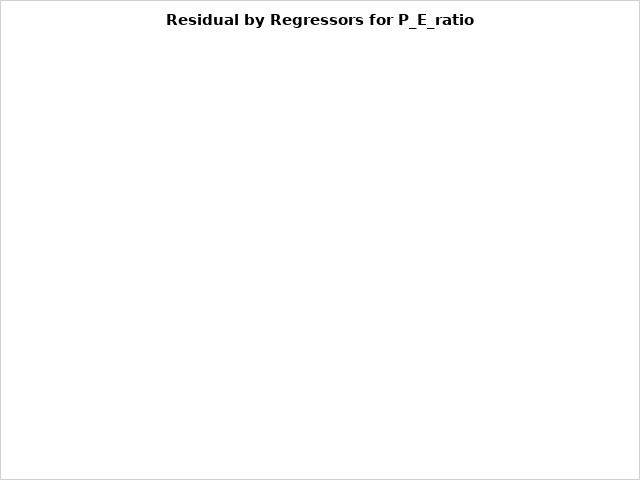
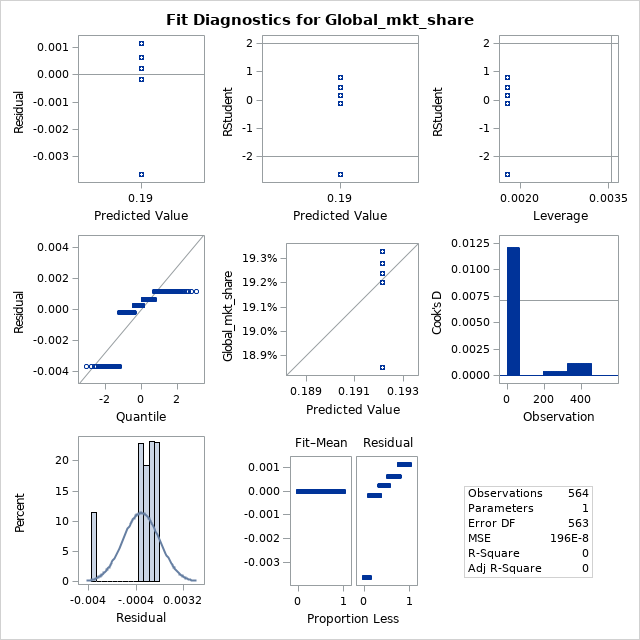
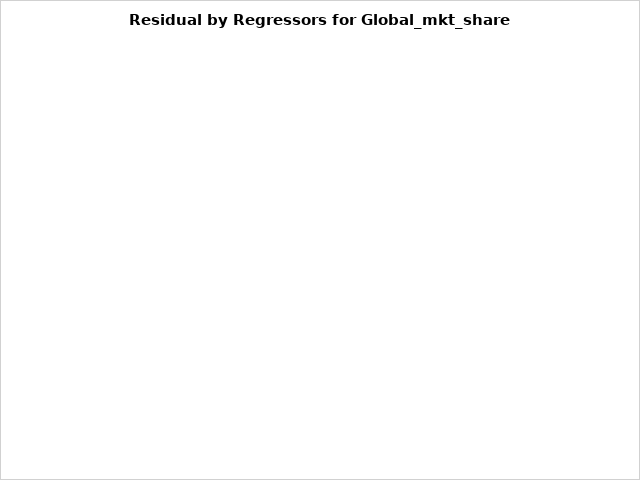
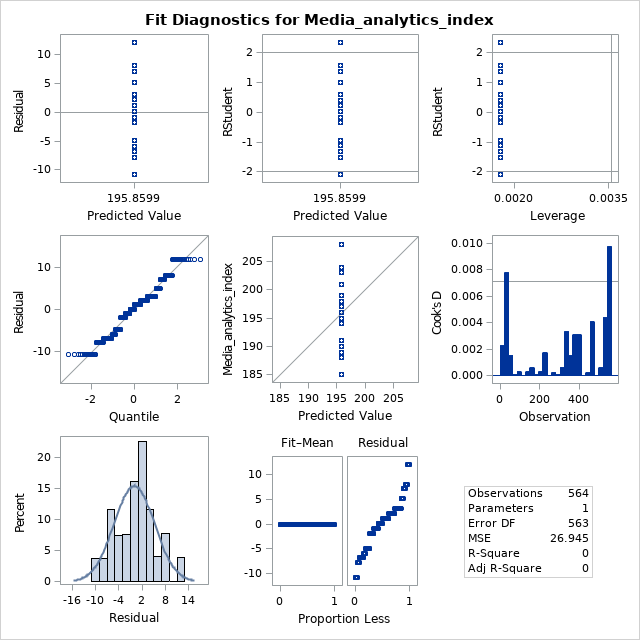
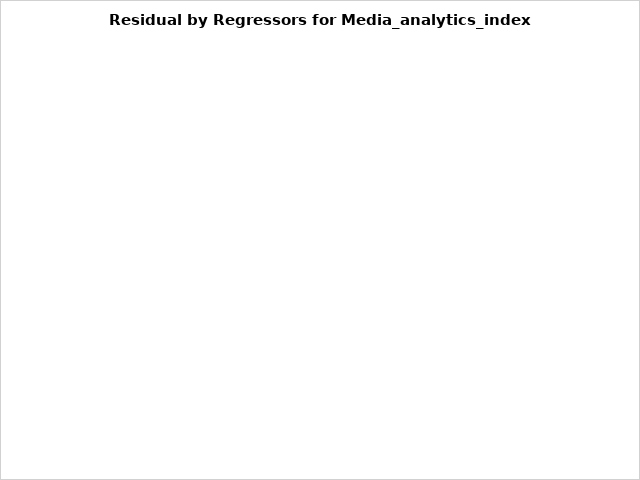
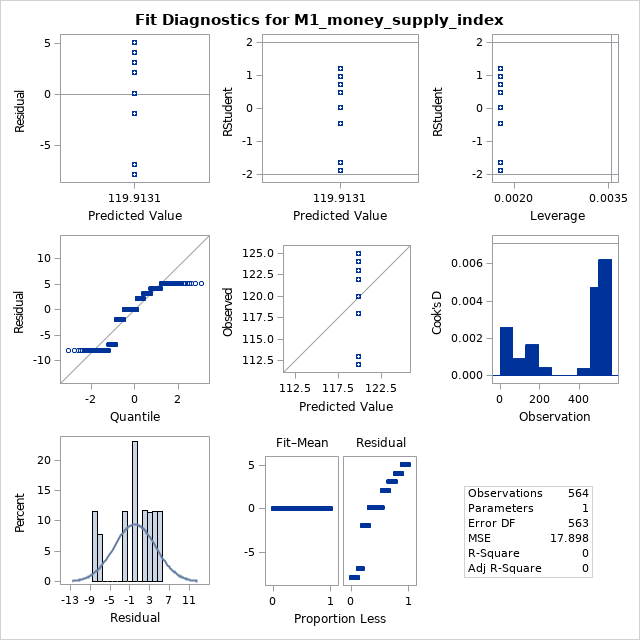
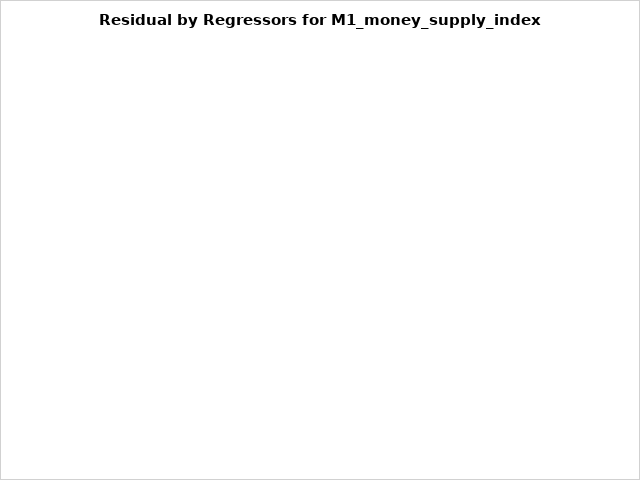
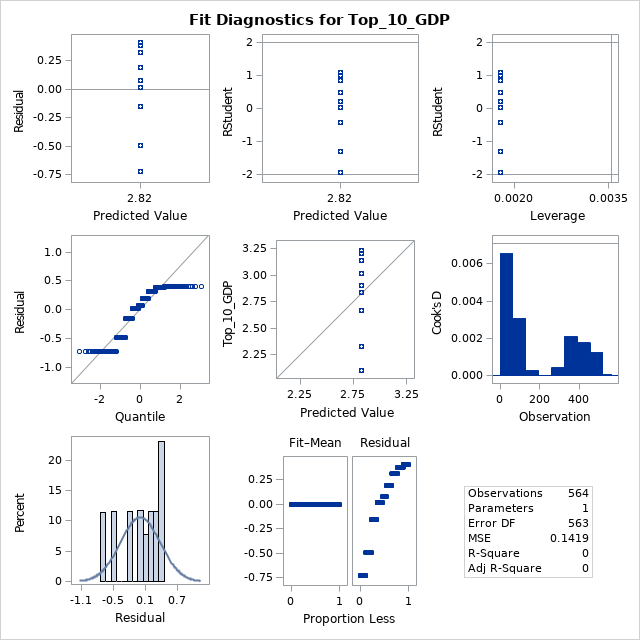
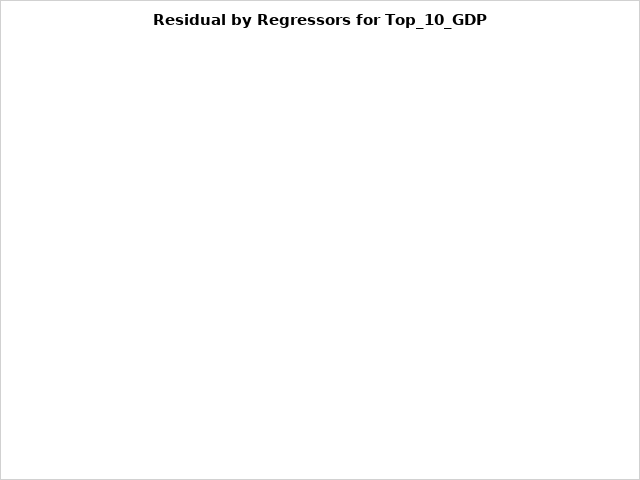

In [14]:
/* Proc Regression Code for Autocorrelation: */
PROC REG DATA=build;
ID date;
MODEL basket_index eps p_e_ratio global_mkt_share media_analytics_index
m1_money_supply_index top_10_gdp = /dw;
RUN;


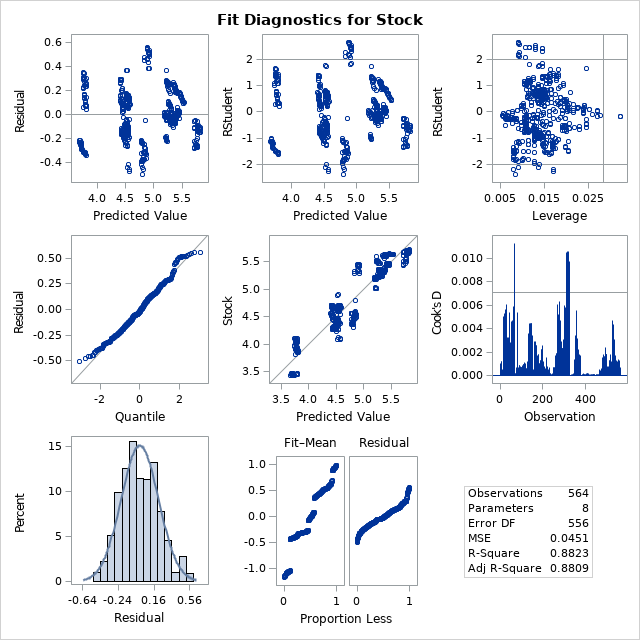
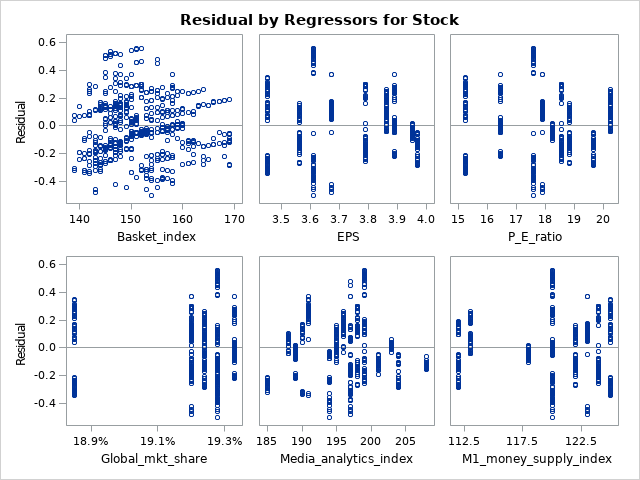
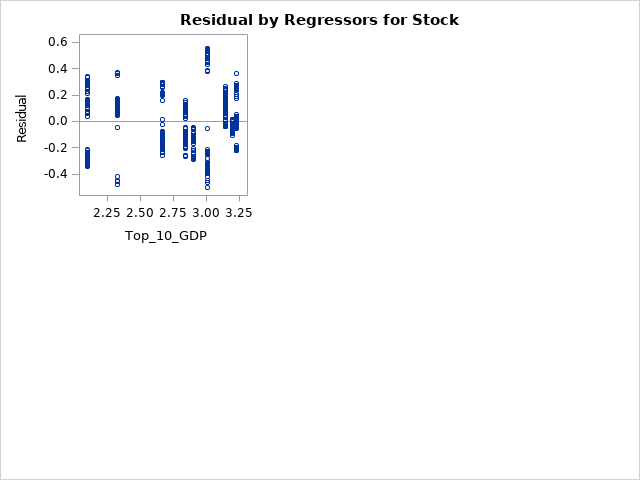

In [15]:
/* Code to Generate PROC REG Based Forecast */
PROC REG DATA=build OUTEST=REGOUT;
ID DATE;
MODEL Stock = basket_index eps p_e_ratio global_mkt_share media_analytics_index
m1_money_supply_index top_10_gdp;
RUN;


In [16]:
PROC SCORE DATA=validation
SCORE=REGOUT OUT=RSCOREP TYPE=PARMS;
var basket_index eps p_e_ratio global_mkt_share media_analytics_index
m1_money_supply_index top_10_gdp;
RUN;


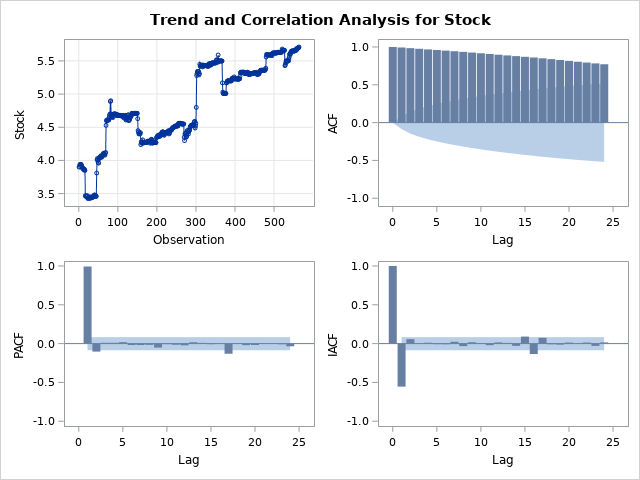

In [17]:
PROC ARIMA Data=build;
IDENTIFY VAR=STOCK;
RUN;


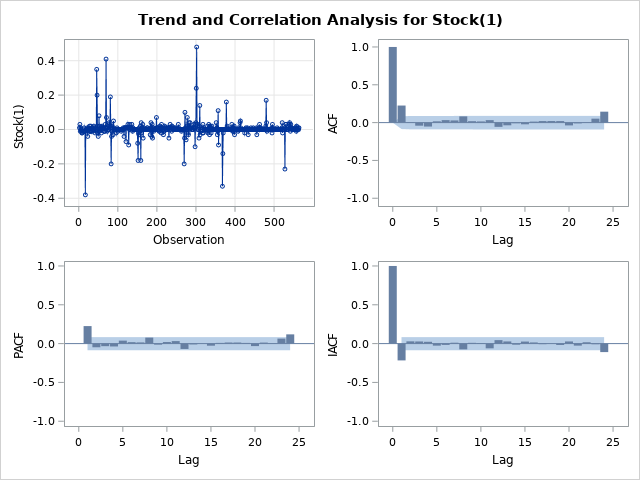
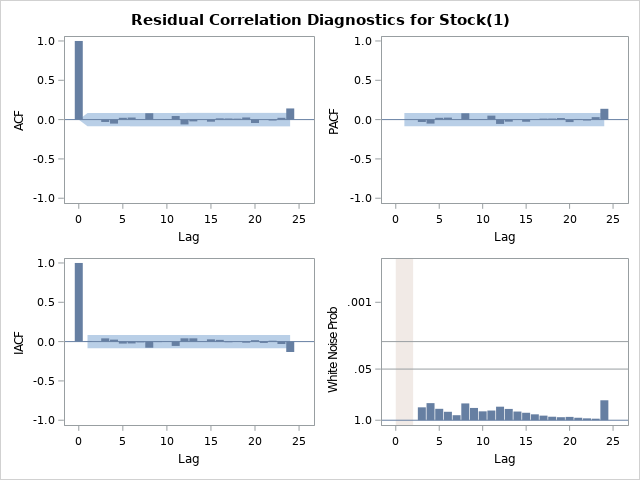
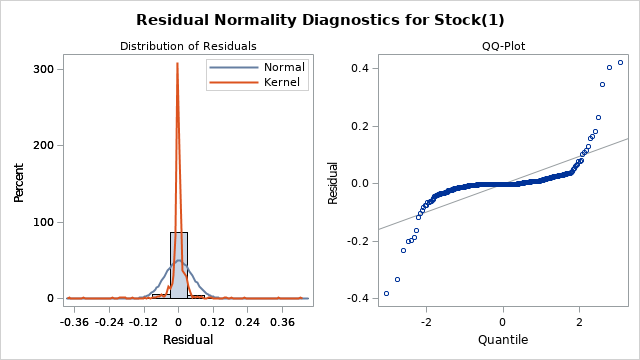

In [18]:
/* PROC ARIMA (1,1,1) Code: */
PROC ARIMA Data=build;
IDENTIFY VAR=STOCK(1);
ESTIMATE p=1 q=1;
RUN;


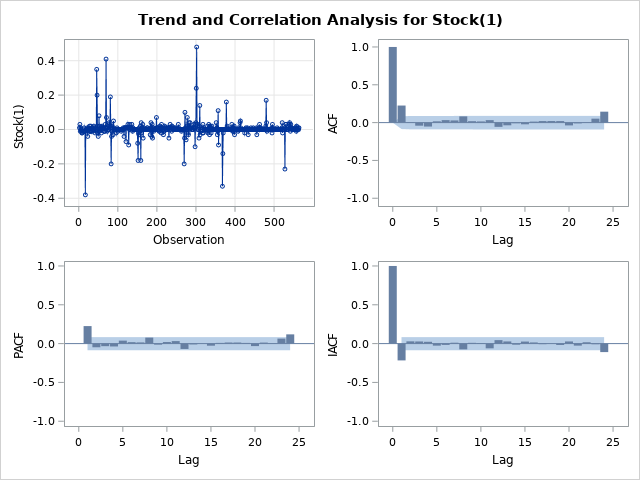
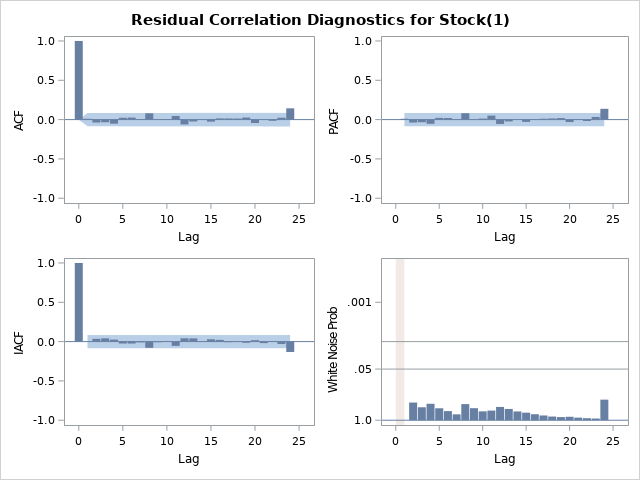
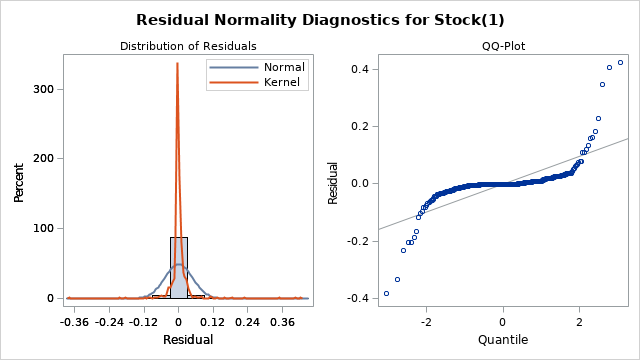

In [19]:
/* PROC ARIMA (1,1,0) Code: */
PROC ARIMA Data=build;
IDENTIFY VAR=STOCK(1);
ESTIMATE p=1;
RUN;


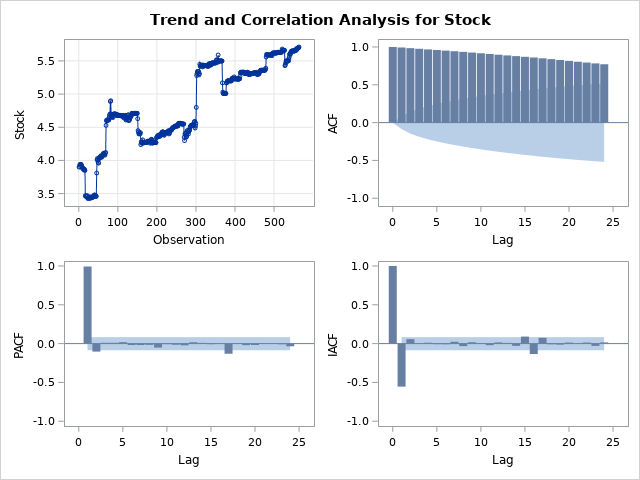

In [20]:
/* Code for Automated Model Selection: */
PROC ARIMA DATA=build;
IDENTIFY VAR=STOCK SCAN;
RUN;


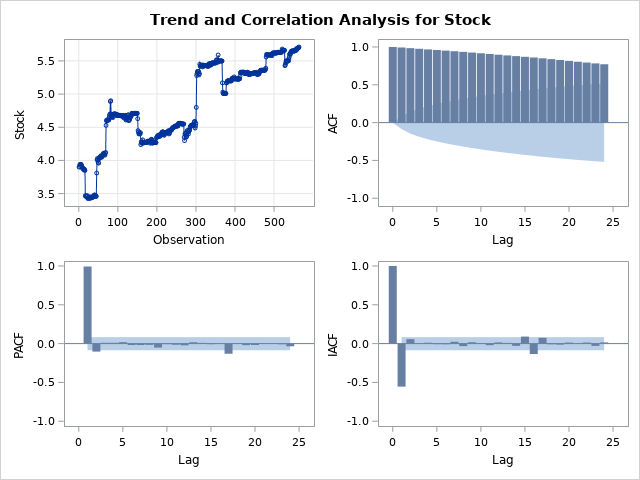
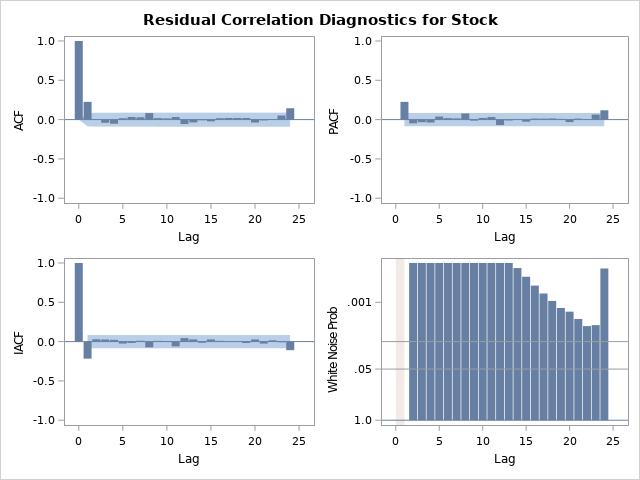
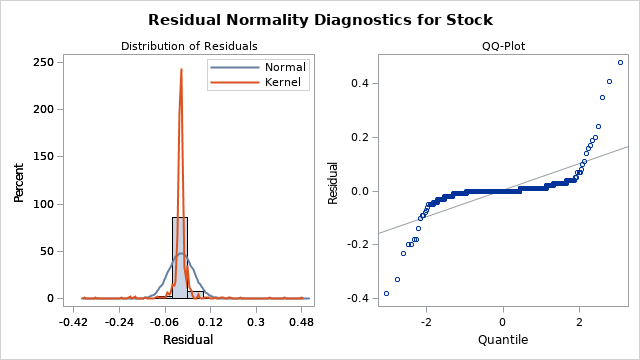
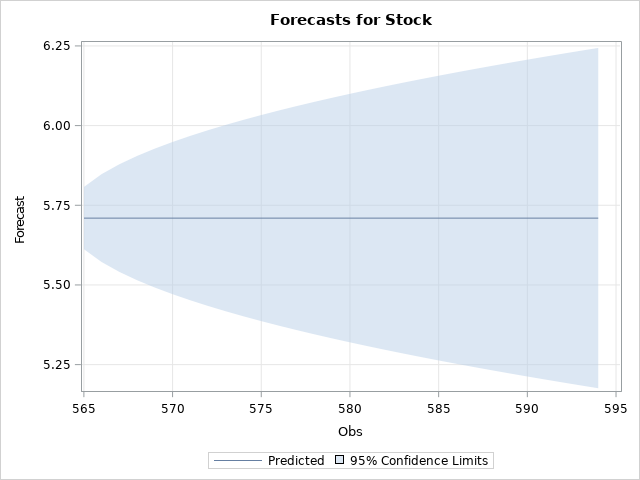

In [21]:
/* Code for Forecasting: */
PROC ARIMA DATA=build;
IDENTIFY VAR=STOCK SCAN;
ESTIMATE p=1 q=0;
FORECAST LEAD=30 OUT=PREDICT;
RUN;